## Likelihood:

The likelihood of the parameters given the observed data quantifies the probability of observing the entire dataset if the data were generated from a particular distribution with specific parameters. It’s a function of the parameters of the model.


The likelihood function for a set of parameters $\theta$ given data $X$ is defined as:

$$
L(\theta | X) = P(X | \theta)
$$

where:
- $L(\theta | X)$ is the likelihood of $\theta$ given $X$.
- $P(X | \theta)$ is the probability of observing the data $X$ given the parameters $\theta$.



 **It is different from the Probability of the dataset following a particular distribution**: This is a more general concept that considers the overall fit of the data to the assumed distribution without specifying the parameter values.

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
def likelihood(data, params):
    """
    Calculate the likelihood of observing the data given the parameters of a Gaussian distribution.

    Parameters:
    data (array-like): Observed data points.
    params (tuple): Parameters of the Gaussian distribution (mean, standard deviation).

    Returns:
    float: Likelihood of observing the data given the parameters.
    """
    mean, std = params
    # Calculate the likelihood by multiplying the probability density function (PDF) of each data point
    likelihoods = [1 / (std * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean) / std) ** 2) for x in data]
    # Multiply the likelihoods of all data points to get the overall likelihood
    return np.prod(likelihoods)

In [15]:
# Generate some data from a Gaussian distribution
mu_real = 0.5
sigma_real = 0.3
data = np.random.normal(mu_real, sigma_real, 1000)

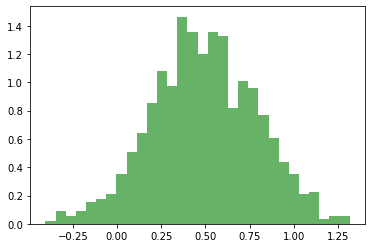

In [16]:
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.show()

In [17]:
# Define a range of possible mu and sigma values
mu_values = np.linspace(-1, 2, 100)
sigma_values = np.linspace(0.1, 1, 100)

In [18]:
# Calculate the likelihood for each combination of mu and sigma
likelihood = np.array([[np.prod(stats.norm.pdf(data, mu, sigma)) 
                        for mu in mu_values] 
                       for sigma in sigma_values])

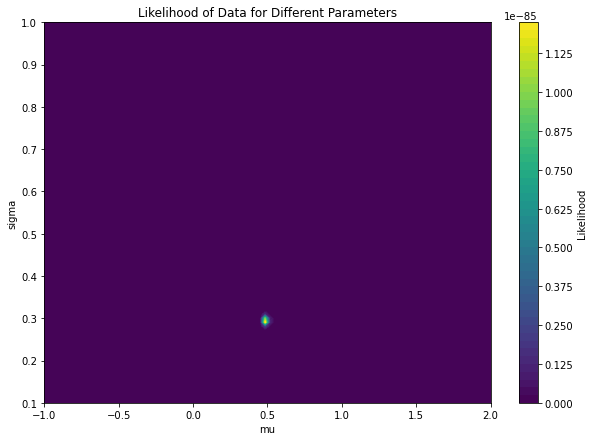

In [19]:
# Plot the likelihood
plt.figure(figsize=(10, 7))
plt.contourf(mu_values, sigma_values, likelihood, levels=50)
plt.colorbar(label='Likelihood')
plt.xlabel('mu')
plt.ylabel('sigma')
plt.title('Likelihood of Data for Different Parameters')
plt.show()


In [22]:
# Now let's test if the data follows a Gaussian distribution
# Statistical test can yeild false positives or false negatives, so it is important to visualize the data
# Here, we know the data is Gaussian, but in practice we would not know this
# Type I error: False positive, we reject the null hypothesis when it is true
# Type II error: False negative, we accept the null hypothesis when it is false
# Here, the null hypothesis is that the data is Gaussian
k2, p = stats.normaltest(data)
print(f"p = {p:.4f}")
if p < 0.05:
    print("The data does not follow a Gaussian distribution, Type I error")
else:
    print("The data follows a Gaussian distribution")

p = 0.5659
The data follows a Gaussian distribution


In [ ]:
# import numpy as np



# def negative_log_likelihood(params, data):
#     """
#     Calculate the negative log-likelihood of the observed data given the parameters of a Gaussian distribution.

#     Parameters:
#     params (tuple): Parameters of the Gaussian distribution (mean, standard deviation).
#     data (array-like): Observed data points.

#     Returns:
#     float: Negative log-likelihood of observing the data given the parameters.
#     """
#     return -np.log(likelihood(data, params))

# def estimate_parameters(data):
#     """
#     Estimate the parameters of a Gaussian distribution using maximum likelihood estimation (MLE).

#     Parameters:
#     data (array-like): Observed data points.

#     Returns:
#     tuple: Estimated parameters of the Gaussian distribution (mean, standard deviation).
#     """
#     # Initial guess for mean and standard deviation
#     initial_guess = [np.mean(data), np.std(data)]
#     # Use optimization algorithm (e.g., Nelder-Mead) to minimize negative log-likelihood
#     result = minimize(negative_log_likelihood, initial_guess, args=(data,), method='Nelder-Mead')
#     # Extract estimated parameters
#     estimated_mean, estimated_std = result.x
#     return estimated_mean, estimated_std

# # Example usage:
# np.random.seed(42)  # for reproducibility
# true_mean = 2
# true_std = 1.5
# data = np.random.normal(loc=true_mean, scale=true_std, size=100)
# estimated_mean, estimated_std = estimate_parameters(data)
# print("True Mean:", true_mean)
# print("True Standard Deviation:", true_std)
# print("Estimated Mean:", estimated_mean)
# print("Estimated Standard Deviation:", estimated_std)
